<div align="center">

# ELLA ACCELERATOR

Sentiment Analysis

Topic Modelling


### **User Guide**
- Upload csv containing...
- click on run...

#Input Required Libraries/Packages

In [ ]:
#For Data Manipulation
import os
import pandas as pd 
import numpy as np
import nltk
import nltk.corpus
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
import string
from nltk.corpus import stopwords, wordnet
from nltk.stem import WordNetLemmatizer
nltk.download('stopwords')
nltk.download('wordnet')
nltk.download('punkt')

#For Data Visualization
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns



[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Unzipping corpora/wordnet.zip.
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


## Load Data

Upload csv file with...[include sample picture]

In [ ]:
#Load data
from google.colab import files
data_to_load = files.upload()

In [ ]:
import io
#survey = pd.read_csv(io.BytesIO(data_to_load['Altitude 2020 - Final Survey.csv']))
survey = pd.read_csv("Altitude 2020 - Final Survey.csv")
survey

,Your Name,Business Name,Email,Which sector do you classify your business under?,What is the current status of the company?,"Overall, how would you rate the ELLA Altitude program?",Who is your Entrepreneur-in-Residence (EIR)?,How would you rate your level of satisfaction with your Entrepreneur-in-Residence?,Please tell us more about your experience with your EIR:,How would you rate your level of satisfaction with the Mastermind sessions?,Please tell us more about your experience with the Mastermind sessions:,How would you rate your level of satisfaction with the progress check-ins with Nicole?,Please tell us more about your experience with the progress check-ins with Nicole:,How would you rate your level of satisfaction with your Fractional Executive(s)?,Please tell us more about your experience with your Fractional Executive(s):,What do you value the most about the ELLA Altitude program?,What do you value the least about the ELLA Altitude program?,What is one thing you wish we could add or change about the program?,"In order to improve the program, I would suggest:","On a scale of 1-10, how willing are you to recommend the ELLA Altitude Program to another woman entrepreneur?",What was the reason for your score in the previous question?,Do you have anything else you would like to share about ELLA Altitude?,Would you like to receive a certificate of completion?,Please enter the address we should use to send your certificate to:
0,NOORA SHARRAB,Sitti Social Enterprise Ltd,noora@sittisoap.com,"Retail trade, Retail trade",Operating,Very good,Katy Baker,Satisfied,My EiR really helped hone in on some of the ch...,Somewhat unsatisfied,I felt a lot of pressure to show up for the cl...,Very satisfied,I appreciated Nicoles ability to relieve some ...,Satisfied,I feel I set higher expectations with my SOW t...,I really appreciated the funding aspect to plu...,The Mastermind sessions were difficult for me.,I would have hoped that the program timeframe ...,Increasing the program length,8,I loved how the team at Ella had a genuine int...,I'm thankful for the opportunity to develop an...,Yes,"233 Fowley Drive\nOakville, Ontario\nCanada"
1,Zuly Matallana,TIARA Bliss Inc.,zuly@tiarashowercap.com,"Retail trade, Retail trade",Operating,Excellent,Alison Philipps,Very satisfied,"We connected with Alison in a deeper way, She ...",Neutral,I think the mastermind didn't work as other ma...,Very satisfied,Nicole is a great leader and she deeply cares ...,Very satisfied,"I am so lucky to work with Mark and Darryl, th...",What I value the most is all the help I receiv...,The time was really short for this program as ...,I probably include more hours to the EIR. I ne...,Increasing the program length,10 - Extremely likely,I don't think there is a program like Ella any...,I just want to THANK YOU all from the bottom o...,Yes,"25 Robb Thompson Road, Mount Albert L01 1M0"
2,Morgan MacDonald,METTAMADE,morgan@mettamade.ca,"Retail trade, Retail trade",Operating,Very good,Katy Baker,Very satisfied,Katy has been very helpful in shifting my mind...,Satisfied,Mastermind sessions have been a good way to co...,Very satisfied,Nicole is very supportive. I feel her approach...,Very satisfied,Imprint has been great. They have met most del...,The work with the EIR and FE have helped me b...,I think the Leadership training in the first h...,I do wish the work with the FE could start by ...,Increasing the program length,10 - Extremely likely,I find it has helped me immensely. I feel more...,NaN,Yes,"Morgan MacDonald\n99 Best Ave\nDundas, ON\nL9H..."
3,Garima Gupta,Artha Learning Inc,garima@arthalearning.com,Educational services,Operating,Excellent,Valerie Fox,Very satisfied,"Val supported us all along, introduced us to ...",Very satisfied,"Aiko is lovely, and tried her best to bring en...",Very satisfied,Nicole is amazing! Her passion about seeing my...,Very satisfied,The access to FE really allowed us to dream bi...,Nicole and FE,The leadership workshop,"Remove the leadersh

Column Names

In [ ]:
survey.columns

Index(['Your Name', 'Business Name', 'Email',
       'Which sector do you classify your business under?',
       'What is the current status of the company?',
       'Overall, how would you rate the ELLA Altitude program?',
       'Who is your Entrepreneur-in-Residence (EIR)?',
       'How would you rate your level of satisfaction with your Entrepreneur-in-Residence?',
       'Please tell us more about your experience with your EIR:',
       'How would you rate your level of satisfaction with the Mastermind sessions?',
       'Please tell us more about your experience with the Mastermind sessions:',
       'How would you rate your level of satisfaction with the progress check-ins with Nicole?',
       'Please tell us more about your experience with the progress check-ins with Nicole:',
       'How would you rate your level of satisfaction with your Fractional Executive(s)?',
       'Please tell us more about your experience with your Fractional Executive(s):',
       'What do you value

# Topic Modelling

In [ ]:
#For Topic Modelling
#!pip install pyLDAvis
import pyLDAvis
import pyLDAvis.gensim_models
import gensim
from gensim import corpora

/usr/local/lib/python3.7/dist-packages/past/types/oldstr.py:5: DeprecationWarning: Using or importing the ABCs from 'collections' instead of from 'collections.abc' is deprecated since Python 3.3,and in 3.9 it will stop working
  from collections import Iterable
/usr/local/lib/python3.7/dist-packages/past/builtins/misc.py:4: DeprecationWarning: Using or importing the ABCs from 'collections' instead of from 'collections.abc' is deprecated since Python 3.3,and in 3.9 it will stop working
  from collections import Mapping
/usr/local/lib/python3.7/dist-packages/sklearn/decomposition/_lda.py:29: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  EPS = np.finfo(np.float).ep

**TOPICS - PROS**

In [ ]:
df = survey[['What do you value the most about the ELLA Altitude program?']] #replace ' ' with the column you want to analyze (ensure the quotation marks are around the text)
df = df.dropna()

#expand contraction words
import re

def decontracted(phrase):
    # specific
    phrase = re.sub(r"won\'t", "will not", phrase)
    phrase = re.sub(r"can\'t", "can not", phrase)
    # general
    phrase = re.sub(r"n\'t", " not", phrase)
    phrase = re.sub(r"\'re", " are", phrase)
    phrase = re.sub(r"\'s", " is", phrase)
    phrase = re.sub(r"\'d", " would", phrase)
    phrase = re.sub(r"\'ll", " will", phrase)
    phrase = re.sub(r"\'t", " not", phrase)
    phrase = re.sub(r"\'ve", " have", phrase)
    phrase = re.sub(r"\'m", " am", phrase)
    return phrase

df['response'] = df.apply(lambda row : decontracted(row['What do you value the most about the ELLA Altitude program?']), axis = 1)

#Tokenization the comments column
def token_(x):
    token = word_tokenize(x)
    return token
df['response_token'] = df.apply(lambda row : token_(row['response']), axis = 1)

# Lower Casing the Tokenized comments
def lower_case(x):
    ret = []
    for words in x:
        words = words.lower()
        ret.append(words)
    return ret 
df['response_token'] = df.apply(lambda row : lower_case(row['response_token']), axis = 1)

# Removing Punctuation
import re 
punctutation = re.compile(r'[-.?!,:;()%\/|0-9""]')
def post_punctutation(x):
    ret = []
    for words in x:
        item = punctutation.sub("",words)
        if len(item)>0:
            ret.append(item)
    return ret 
df['response_token'] = df.apply(lambda row : post_punctutation(row['response_token']), axis = 1)
#len(df['Comment_token_punct'][0]), len(df['Comment_token'][0])

#Stopwords
stop_words = set(stopwords.words('english'))
def remove_stopwords(x):
    filtered_sentence = []  
    for w in x:
        if w not in stop_words:
            filtered_sentence.append(w)
    return filtered_sentence
df['response_stopwords'] = df.apply(lambda row : remove_stopwords(row['response_token']), axis = 1)
#len(df['Comment_token_punct_stopwords'][0]),len(df['Comment_token_punct'][0]),

#POS Tagging
nltk.download('averaged_perceptron_tagger')
df['response_tags'] = df['response_stopwords'].apply(nltk.tag.pos_tag)

def get_wordnet_pos(tag):
    if tag.startswith('J'):
        return wordnet.ADJ
    elif tag.startswith('V'):
        return wordnet.VERB
    elif tag.startswith('N'):
        return wordnet.NOUN
    elif tag.startswith('R'):
        return wordnet.ADV
    else:
        return wordnet.NOUN
df['wordnet_pos'] = df['response_tags'].apply(lambda x: [(word, get_wordnet_pos(pos_tag)) for (word, pos_tag) in x])

wnl = WordNetLemmatizer()
df['lemmatized'] = df['wordnet_pos'].apply(lambda x: [wnl.lemmatize(word, tag) for word, tag in x])

# ALl the duplicate words will be removed from the text/comments including all the adjectives and verbs.
def unique_(test_list):
    res = [] 
    for i in test_list: 
        if i not in res: 
            res.append(i) 
    return res
df['response_unique'] = df.apply(lambda row : unique_(row['lemmatized']), axis = 1)
#len(df['Comment_token_punct_stopwords_unique'][0]),len(df['lemmatized'][0]),

#select nouns only
df['nouns'] = df['wordnet_pos'].apply(lambda x: [word for (word, pos) in x if pos[0] == 'n'])

text_list=df['nouns'].tolist()
#print(text_list[0])

dictionary = corpora.Dictionary(text_list)
doc_term_matrix = [dictionary.doc2bow(rev) for rev in text_list]

# Creating the object for LDA model using gensim library
LDA = gensim.models.ldamodel.LdaModel

# Build LDA model
lda_model = LDA(corpus=doc_term_matrix, id2word=dictionary, num_topics=3, random_state=42,
                chunksize=1000, passes=50,iterations=100);

In [ ]:
df['response_unique']

0    [really, appreciated, funding, aspect, plug, n...
1    [value, help, receive, business, get, foundati...
2    [work, eir, fe, help, good, understanding, bra...
3                                         [nicole, fe]
4    [fe, program, highlight, extremely, helpful, g...
5    [community, people, fractional, executive, pro...
6                             [access, fex, expertise]
Name: response_unique, dtype: object

In [ ]:
lda_model.print_topics()

[(0,
  '0.068*"program" + 0.039*"expertise" + 0.038*"two" + 0.038*"highlight" + 0.038*"service" + 0.038*"would" + 0.038*"investment" + 0.038*"gift" + 0.038*"year" + 0.038*"years"'),
 (1,
  '0.084*"brand" + 0.084*"fe" + 0.048*"work" + 0.048*"sense" + 0.048*"marketing" + 0.048*"matters" + 0.048*"operations" + 0.048*"balance" + 0.048*"eir" + 0.048*"validation"'),
 (2,
  '0.040*"business" + 0.040*"us" + 0.040*"shopify" + 0.040*"round" + 0.040*"rebrand" + 0.040*"lot" + 0.040*"help" + 0.040*"foundation" + 0.040*"another" + 0.040*"tables"')]

In [ ]:
pyLDAvis.enable_notebook()
vis = pyLDAvis.gensim_models.prepare(lda_model, doc_term_matrix, dictionary)
vis

/usr/local/lib/python3.7/dist-packages/pyLDAvis/_prepare.py:247: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  by='saliency', ascending=False).head(R).drop('saliency', 1)


PreparedData(topic_coordinates=              x         y  topics  cluster       Freq
topic                                                
0     -0.040758  0.075214       1        1  38.683968
2     -0.059230 -0.066488       2        1  35.370078
1      0.099988 -0.008726       3        1  25.945954, topic_info=          Term      Freq    Total Category  logprob  loglift
21       brand  1.000000  1.00000  Default  30.0000  30.0000
23          fe  1.000000  1.00000  Default  29.0000  29.0000
29       world  1.000000  1.00000  Default  28.0000  28.0000
22         eir  1.000000  1.00000  Default  27.0000  27.0000
24   marketing  1.000000  1.00000  Default  26.0000  26.0000
..         ...       ...      ...      ...      ...      ...
18          us  0.162701  1.66479   Topic3  -4.4179  -0.9764
30        gift  0.162588  1.11771   Topic3  -4.4186  -0.5787
31   highlight  0.162588  1.11771   Topic3  -4.4186  -0.5787
32  investment  0.162588  1.11771   Topic3  -4.4186  -0.5787
34     service  0.162588  1.11771   Topic3  -4.4186  -0.5787

[146 rows x 6 columns], token_table=      Topic      Freq        Term
term                             
42        2  0.921542      access
8         2  0.921524     another
0         1  0.894700      aspect
20        3  0.975129     balance
21        3  0.660973       brand
9         1  0.600676    business
9         2  0.600676    business
39        2  0.921533   community
1         1  0.894700     company
22        3  0.975129         eir
40        2  0.921533   executive
2         1  0.600548   expertise
2         2  0.600548   expertise
10        2  0.921524      factor
23        3  0.660914          fe
43        2  0.921542         fex
11        2  0.921524  foundation
3         1  0.894700     funding
30        1  0.894687        gift
4         1  0.894700       group
12        2  0.921524        help
31        1  0.894687   highlight
32        1  0.894687  investment
13        2  0.921524         lot
24        3  0.975129   marketing
25        3  0.975129     matters
5         1  0.894700  mentorship
26        3  0.975129  operations
41        2  0.921533      people
6         1  0.894700        plug
33        1  0.445355     program
33        2  0.445355     program
14        2  0.921524     rebrand
15        2  0.921524       round
27        3  0.975129       sense
34        1  0.894687     service
16        2  0.921524     shopify
17        2  0.921524      tables
35        1  0.894687         two
18        1  0.600676          us
18        2  0.600676          us
28        3  0.975129  validation
19        2  0.921524       value
7         1  0.623164        work
7         3  0.623164        work
29        3  0.975129       world
36        1  0.894687       would
37        1  0.894687        year
38        1  0.894687       years, R=30, lambda_step=0.01, plot_opts={'xlab': 'PC1', 'ylab': 'PC2'}, topic_order=[1, 3, 2])

WORD Frequency

In [ ]:
#recount the frequency of all the words
from nltk.probability import FreqDist
fdist = FreqDist()
for i in range(len(df)):
    for word in text_list[i]:
        fdist[word]+=1
word_freqs2 = pd.DataFrame(fdist.items(), columns = ['word', 'frequency']).sort_values(by = ['frequency'], ascending = False)
word_freqs2

word_freqs2.head(20)

,word,frequency
30,program,3
22,brand,2
3,expertise,2
4,work,2
21,fe,2
10,business,2
13,us,2
34,service,1
27,validation,1
28,matters,1


WORD CLOUD

In [ ]:
#For Word Cloud
!pip install wordcloud
from wordcloud import WordCloud, STOPWORDS

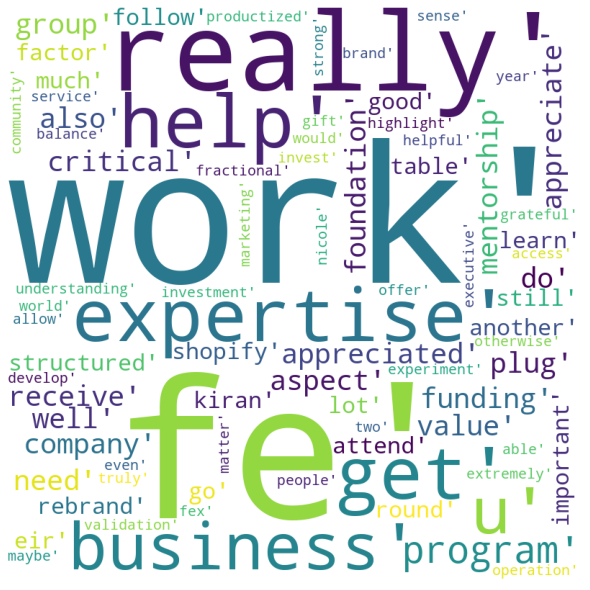

In [ ]:
#df['response1'] = survey['What do you value the most about the ELLA Altitude program?'] #replace ' ' with the column you want to analyze

comment_words = '' 
stopwords = set(STOPWORDS) 
  
# iterate through the csv file 
for val in df.response_unique: 
      
    # typecaste each val to string 
    val = str(val) 
  
    # split the value 
    tokens = val.split() 
      
    # Converts each token into lowercase 
    for i in range(len(tokens)): 
        tokens[i] = tokens[i].lower() 
      
    comment_words += " ".join(tokens)+" "
  
wordcloud = WordCloud(width = 800, height = 800, 
                background_color ='white', 
                stopwords = stopwords, 
                min_font_size = 10).generate(comment_words) 
  
# plot the WordCloud image                        
plt.figure(figsize = (8, 8), facecolor = None) 
plt.imshow(wordcloud) 
plt.axis("off") 
plt.tight_layout(pad = 0) 
  
plt.show()

## Sentiment Analysis

In [ ]:
!pip install VaderSentiment
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer
analyser = SentimentIntensityAnalyzer()
def sentiment_analyzer_scores(sentence):
    score = analyser.polarity_scores(sentence)
    return score['compound']

We used the vader sentiment analyser to compute the coumpund sentiment score of each review in pro_reviews and con_reviews section.

In [ ]:
survey['sentiment'] = survey.apply(lambda row : sentiment_analyzer_scores(row['Please tell us more about your experience with the progress check-ins with Nicole:']), axis = 1)
survey[['Your Name', 'Business Name', 'Email','Please tell us more about your experience with the progress check-ins with Nicole:','sentiment']]

,Your Name,Business Name,Email,Please tell us more about your experience with the progress check-ins with Nicole:,sentiment
0,NOORA SHARRAB,Sitti Social Enterprise Ltd,noora@sittisoap.com,I appreciated Nicoles ability to relieve some ...,0.8319
1,Zuly Matallana,TIARA Bliss Inc.,zuly@tiarashowercap.com,Nicole is a great leader and she deeply cares ...,0.9883
2,Morgan MacDonald,METTAMADE,morgan@mettamade.ca,Nicole is very supportive. I feel her approach...,0.7778
3,Garima Gupta,Artha Learning Inc,garima@arthalearning.com,Nicole is amazing! Her passion about seeing my...,0.9348
4,Heather Purcell,fin/ally,heather.purcell@finallycpa.com,Nicole is very generous with her time and regu...,0.9152
5,Susan Varty,HeadStart Copywriting (Varty Group Inc. o/a He...,susan.varty@headstartcopywriting.com,It was great to have someone to talk to and gi...,0.9080
6,Aymen Dewji,ShiftRight Consulting Inc.,aymen.dewji@shiftright.ca,"Good opportunity to check in, would have been ...",0.8225


Average Sentiment Score

In [ ]:
survey['sentiment'].mean()

0.8826428571428572